In [1]:
import fastf1
import pandas as pd
import numpy as np

# Data Exploration

In [11]:
circuits = pd.read_csv('f1_2022/circuits.csv', sep=',', engine='python', encoding='latin', header='infer')
constructorResults = pd.read_csv('f1_2022/constructor_results.csv', sep=',', engine='python', encoding='latin', header='infer')
constructors = pd.read_csv('f1_2022/constructors.csv', sep=',', engine='python', encoding='latin', header='infer')
constructorStandings = pd.read_csv('f1_2022/constructor_standings.csv', sep=',', engine='python', encoding='latin', header='infer')
drivers = pd.read_csv('f1_2022/drivers.csv', sep=',', engine='python', encoding='latin', header='infer')
driverStandings = pd.read_csv('f1_2022/driver_standings.csv', sep=',', engine='python', encoding='latin', header='infer')
lapTimes = pd.read_csv('f1_2022/lap_times.csv', sep=',', engine='python', encoding='latin', header='infer')
pitStops = pd.read_csv('f1_2022/pit_stops.csv', sep=',', engine='python', encoding='latin', header='infer')
qualifying = pd.read_csv('f1_2022/qualifying.csv', sep=',', engine='c', encoding='latin', header='infer')
races = pd.read_csv('f1_2022/races.csv', sep=',', engine='c', encoding='latin', header='infer')
results = pd.read_csv('f1_2022/results.csv', sep=',', engine='python', encoding='latin', header='infer')
seasons = pd.read_csv('f1_2022/seasons.csv', sep=',', engine='python', encoding='latin', header='infer')
status = pd.read_csv('f1_2022/status.csv', sep=',', engine='python', encoding='latin', header='infer')

In [120]:
qualifying

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
7511,7535,988,154,210,8,16,1:39.516,NaN,NaN
7512,7536,988,842,5,10,17,1:39.724,NaN,NaN
7513,7537,988,836,15,94,18,1:39.930,NaN,NaN
7514,7538,988,828,15,9,19,1:39.994,NaN,NaN


In [31]:
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23772,23777,988,842,5,10.0,17,16.0,16,16,0.0,54,NaN,NaN,33.0,16.0,01:43.8,192.542,11
23773,23778,988,828,15,9.0,19,17.0,17,17,0.0,54,NaN,NaN,36.0,15.0,01:43.6,193.057,11
23774,23779,988,840,3,18.0,15,18.0,18,18,0.0,54,NaN,NaN,52.0,6.0,01:42.3,195.402,11
23775,23780,988,832,4,55.0,12,NaN,R,19,0.0,31,NaN,NaN,26.0,14.0,01:43.4,193.41,36


In [7]:
races[races['year']==2017]

,raceId,year,round,circuitId,name,date,time,url
956,969,2017,1,1,Australian Grand Prix,26/03/17,5:00:00,http://en.wikipedia.org/wiki/2017_Australian_G...
957,970,2017,2,17,Chinese Grand Prix,09/04/17,6:00:00,http://en.wikipedia.org/wiki/2017_Chinese_Gran...
958,971,2017,3,3,Bahrain Grand Prix,16/04/17,15:00:00,http://en.wikipedia.org/wiki/2017_Bahrain_Gran...
959,972,2017,4,71,Russian Grand Prix,30/04/17,12:00:00,http://en.wikipedia.org/wiki/2017_Russian_Gran...
960,973,2017,5,4,Spanish Grand Prix,14/05/17,12:00:00,http://en.wikipedia.org/wiki/2017_Spanish_Gran...
961,974,2017,6,6,Monaco Grand Prix,28/05/17,12:00:00,http://en.wikipedia.org/wiki/2017_Monaco_Grand...
962,975,2017,7,7,Canadian Grand Prix,11/06/17,18:00:00,http://en.wikipedia.org/wiki/2017_Canadian_Gra...
963,976,2017,8,73,Azerbaijan Grand Prix,25/06/17,13:00:00,http://en.wikipedia.org/wiki/2017_Azerbaijan_G...
964,977,2017,9,70,Austrian Grand Prix,09/07/17,12:00:00,http://en.wikipedia.org/wiki/2017_Austrian_Gra...
965,978,2017,10,9,British Grand Prix,16/07/17,12:00:00,http://en.wikipedia.org/wiki/2017_British_Gran...


In [8]:
races_2017 = races[races['year']==2017]

In [35]:
races_2017

,raceId,year,round,circuitId,name,date,time,url
956,969,2017,1,1,Australian Grand Prix,2017-03-26,05:00:00,https://en.wikipedia.org/wiki/2017_Australian_...
957,970,2017,2,17,Chinese Grand Prix,2017-04-09,06:00:00,https://en.wikipedia.org/wiki/2017_Chinese_Gra...
958,971,2017,3,3,Bahrain Grand Prix,2017-04-16,15:00:00,https://en.wikipedia.org/wiki/2017_Bahrain_Gra...
959,972,2017,4,71,Russian Grand Prix,2017-04-30,12:00:00,https://en.wikipedia.org/wiki/2017_Russian_Gra...
960,973,2017,5,4,Spanish Grand Prix,2017-05-14,12:00:00,https://en.wikipedia.org/wiki/2017_Spanish_Gra...
961,974,2017,6,6,Monaco Grand Prix,2017-05-28,12:00:00,https://en.wikipedia.org/wiki/2017_Monaco_Gran...
962,975,2017,7,7,Canadian Grand Prix,2017-06-11,18:00:00,https://en.wikipedia.org/wiki/2017_Canadian_Gr...
963,976,2017,8,73,Azerbaijan Grand Prix,2017-06-25,13:00:00,https://en.wikipedia.org/wiki/2017_Azerbaijan_...
964,977,2017,9,70,Austrian Grand Prix,2017-07-09,12:00:00,https://en.wikipedia.org/wiki/2017_Austrian_Gr...
965,978,2017,10,9,British Grand Prix,2017-07-16,12:00:00,https://en.wikipedia.org/wiki/2017_British_Gra...


In [9]:
race_ids = races_2017['raceId'].tolist()

In [54]:
results_2017 = results[results['raceId'].isin(race_ids)]

In [59]:
results_2017

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
23374,23379,969,20,6,5.0,2,1.0,1,1,25.0,57,24:11.7,5051672.0,53.0,3.0,01:26.6,220.351,1
23375,23380,969,1,131,44.0,1,2.0,2,2,18.0,57,9.975,5061647.0,44.0,6.0,01:27.0,219.351,1
23376,23381,969,822,131,77.0,3,3.0,3,3,15.0,57,11.25,5062922.0,56.0,2.0,01:26.6,220.465,1
23377,23382,969,8,6,7.0,4,4.0,4,4,12.0,57,22.393,5074065.0,56.0,1.0,01:26.5,220.605,1
23378,23383,969,830,9,33.0,5,5.0,5,5,10.0,57,28.827,5080499.0,43.0,5.0,01:27.0,219.525,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23772,23777,988,842,5,10.0,17,16.0,16,16,0.0,54,NaN,NaN,33.0,16.0,01:43.8,192.542,11
23773,23778,988,828,15,9.0,19,17.0,17,17,0.0,54,NaN,NaN,36.0,15.0,01:43.6,193.057,11
23774,23779,988,840,3,18.0,15,18.0,18,18,0.0,54,NaN,NaN,52.0,6.0,01:42.3,195.402,11
23775,23780,988,832,4,55.0,12,NaN,R,19,0.0,31,NaN,NaN,26.0,14.0,01:43.4,193.41,36


# PCA on 2017 DATA

In [162]:
data = results_2017[['driverId', 'constructorId', 'position', 'points', 'grid', 'milliseconds', 'statusId']]

In [163]:
data['milliseconds'] = data['milliseconds'].fillna(0)

/tmp/ipykernel_28813/4257381273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['milliseconds'] = data['milliseconds'].fillna(0)


In [164]:
data

,driverId,constructorId,position,points,grid,milliseconds,statusId
23374,20,6,1.0,25.0,2,5051672.0,1
23375,1,131,2.0,18.0,1,5061647.0,1
23376,822,131,3.0,15.0,3,5062922.0,1
23377,8,6,4.0,12.0,4,5074065.0,1
23378,830,9,5.0,10.0,5,5080499.0,1
...,...,...,...,...,...,...,...
23772,842,5,16.0,0.0,17,0.0,11
23773,828,15,17.0,0.0,19,0.0,11
23774,840,3,18.0,0.0,15,0.0,11
23775,832,4,NaN,0.0,12,0.0,36


In [176]:
colors = map(lambda x: 'red' if x <=4 else 'blue' if x>4 and x <=8 else 'orange', data['position'].tolist())
colors = list(colors)

In [140]:
numpy_data = data.to_numpy()

In [146]:
numpy_data = numpy_data/np.linalg.norm(numpy_data, axis=0)[np.newaxis, :]

In [145]:
np.linalg.norm(numpy_data, axis=0)

array([1.39024027e+04, 1.57167427e+03, 1.75442298e+02, 2.39104580e+02,
       7.45651048e+07, 6.16171242e+02])

In [195]:
numpy_data

array([[1.43860025e-03, 3.81758493e-03, 1.42496993e-01, 8.36454075e-03,
        6.77484731e-02, 1.62292546e-03],
       [7.19300125e-05, 8.33506044e-02, 1.02597835e-01, 4.18227038e-03,
        6.78822488e-02, 1.62292546e-03],
       [5.91264702e-02, 8.33506044e-02, 8.54981960e-02, 1.25468111e-02,
        6.78993480e-02, 1.62292546e-03],
       ...,
       [6.04212105e-02, 1.90879247e-03, 0.00000000e+00, 6.27340556e-02,
        0.00000000e+00, 1.78521801e-02],
       [5.98457704e-02, 2.54505662e-03, 0.00000000e+00, 5.01872445e-02,
        0.00000000e+00, 5.84253167e-02],
       [5.87668202e-02, 5.72637740e-03, 0.00000000e+00, 1.67290815e-02,
        0.00000000e+00, 1.46063292e-02]])

In [85]:
from sklearn import decomposition as decomposition

In [185]:
pca = decomposition.PCA(2)

In [149]:
X = pca.fit_transform(numpy_data[:, 2:])

In [97]:
from matplotlib import pyplot as plt

In [151]:
ids = da`ta['driverId'].tolist()

## Plot and color by positions range

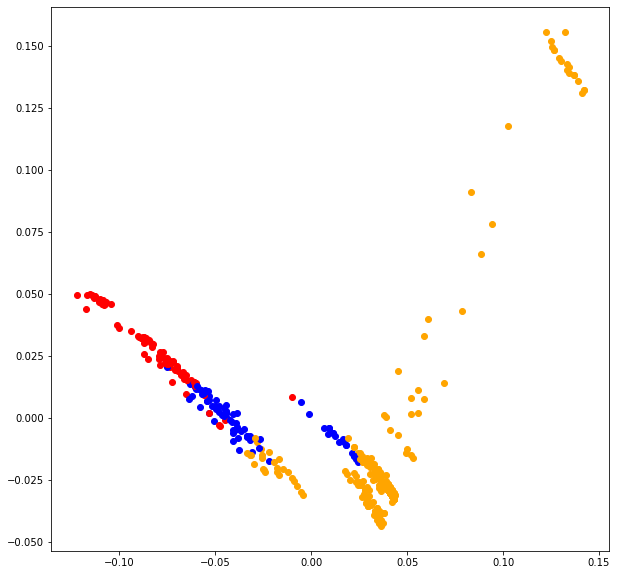

In [177]:
plt.figure(figsize=(10, 10))

for point, color in zip(X, colors):
    plt.scatter(point[0], point[1], color=color)

# Years with Driver Champion different from Constructor Champion

In [13]:
driverStandings[driverStandings['position']==1]

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
8,9,19,1,14.0,1,1,1
33,34,20,8,19.0,1,1,1
54,55,21,8,29.0,1,1,2
75,76,22,8,35.0,1,1,2
...,...,...,...,...,...,...,...
33333,70720,1072,830,369.5,1,1,9
33354,70741,1073,830,395.5,1,1,10
33393,71252,1074,844,26.0,1,1,1
33435,71272,1075,844,45.0,1,1,1


## Merge with Races to Get Year

In [194]:
total_pd = pd.merge(driverStandings, races, on='raceId')
total_pd

,driverStandingsId,raceId,driverId,points,position,positionText,wins,year,round,circuitId,name,date,time,url
0,1,18,1,10.0,1,1,1,2008,1,1,Australian Grand Prix,16/03/08,4:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
1,2,18,2,8.0,2,2,0,2008,1,1,Australian Grand Prix,16/03/08,4:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
2,3,18,3,6.0,3,3,0,2008,1,1,Australian Grand Prix,16/03/08,4:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
3,4,18,4,5.0,4,4,0,2008,1,1,Australian Grand Prix,16/03/08,4:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
4,5,18,5,4.0,5,5,0,2008,1,1,Australian Grand Prix,16/03/08,4:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33471,71308,1076,807,0.0,19,19,0,2022,3,1,Australian Grand Prix,10/04/22,5:00:00,http://en.wikipedia.org/wiki/2022_Australian_G...
33472,71309,1076,815,30.0,4,4,0,2022,3,1,Australian Grand Prix,10/04/22,5:00:00,http://en.wikipedia.org/wiki/2022_Australian_G...
33473,71310,1076,830,25.0,6,6,1,2022,3,1,Australian Grand Prix,10/04/22,5:00:00,http://en.wikipedia.org/wiki/2022_Australian_G...
33474,71311,1076,842,6.0,12,12,0,2022,3,1,Australian Grand Prix,10/04/22,5:00:00,http://en.wikipedia.org/wiki/2022_Australian_G...


## Get maximum points by year and driver

In [197]:
driver_points = total_pd[['driverId', 'year', 'points', 'round']].groupby(['driverId', 'year']).agg({'round':'max', 'points':'max'}).reset_index()
driver_points[driver_points['year']==2021]

,driverId,year,round,points
14,1,2021,22,387.5
56,4,2021,22,81.0
88,8,2021,22,10.0
95,9,2021,22,0.0
210,20,2021,22,43.0
3004,815,2021,22,190.0
3018,817,2021,22,115.0
3038,822,2021,22,226.0
3071,830,2021,22,395.5
3081,832,2021,22,164.5


## Get Results by Year and Driver

In [199]:
results_by_year = pd.merge(results, races, on='raceId')
results_by_year = results_by_year[['driverId', 'constructorId', 'year']].groupby(['driverId', 'year']).agg({'constructorId':'max'}).reset_index()

## Get Constructor for Each Driver Final Standing

In [201]:
driver_points = pd.merge(driver_points, results_by_year, on=['driverId', 'year'])
driver_points[driver_points['driverId']==1]

,driverId,year,round,points,constructorId
0,1,2007,17,109.0,1
1,1,2008,18,98.0,1
2,1,2009,17,49.0,1
3,1,2010,19,240.0,1
4,1,2011,19,227.0,1
5,1,2012,20,190.0,1
6,1,2013,19,189.0,131
7,1,2014,19,384.0,131
8,1,2015,19,381.0,131
9,1,2016,21,380.0,131


## Get Points By Year and Constructor

In [202]:
constructorPoints = pd.merge(constructorStandings, races, on='raceId') 
constructorPoints = constructorPoints[['constructorId', 'year', 'points', 'round']].groupby(['constructorId', 'year']).agg({'points':'max', 'round':'max'}).reset_index()
constructorPoints[constructorPoints['year']==2021]

,constructorId,year,points,round
51,1,2021,275.0,22
102,3,2021,23.0,22
205,6,2021,323.5,22
234,9,2021,585.5,22
576,51,2021,13.0,22
744,117,2021,77.0,22
765,131,2021,613.5,22
891,210,2021,0.0,22
896,213,2021,142.0,22
898,214,2021,155.0,22


## Get Drivers and Constructor Standings  Together

In [215]:
winners = pd.merge(driver_points, constructorPoints[['constructorId', 'year', 'points']], on=['constructorId', 'year'], suffixes=('_driver', '_constructor'))
winners[winners['year']==2021]

,driverId,year,round,points_driver,constructorId,points_constructor
29,1,2021,22,387.5,131,613.5
30,822,2021,22,226.0,131,613.5
114,4,2021,22,81.0,214,155.0
115,839,2021,22,74.0,214,155.0
170,8,2021,22,10.0,51,13.0
171,9,2021,22,0.0,51,13.0
172,841,2021,22,3.0,51,13.0
331,20,2021,22,43.0,117,77.0
332,840,2021,22,34.0,117,77.0
2248,815,2021,22,190.0,9,585.5


## Get Names of Drivers and Constructors

In [208]:
winners_names = pd.merge(winners, drivers[['driverId', 'forename', 'surname']], on='driverId')
winner_names = pd.merge(winners_names, constructors[['constructorId', 'name']], on='constructorId')

In [214]:
winner_names[winner_names['year']==2021]

,driverId,year,round,points_driver,constructorId,points_constructor,forename,surname,name
62,817,2021,22,115.0,1,275.0,Daniel,Ricciardo,McLaren
125,846,2021,22,160.0,1,275.0,Lando,Norris,McLaren
137,1,2021,22,387.5,131,613.5,Lewis,Hamilton,Mercedes
150,822,2021,22,226.0,131,613.5,Valtteri,Bottas,Mercedes
307,844,2021,22,159.0,6,323.5,Charles,Leclerc,Ferrari
414,832,2021,22,164.5,6,323.5,Carlos,Sainz,Ferrari
416,4,2021,22,81.0,214,155.0,Fernando,Alonso,Alpine F1 Team
418,839,2021,22,74.0,214,155.0,Esteban,Ocon,Alpine F1 Team
470,847,2021,22,16.0,3,23.0,George,Russell,Williams
566,849,2021,22,7.0,3,23.0,Nicholas,Latifi,Williams


In [248]:
data = winner_names.groupby('year').agg({'points_constructor':'idxmax', 'points_driver':'idxmax'}).reset_index()

In [249]:
data

,year,points_constructor,points_driver
0,1958,2275,412
1,1959,1921,1921
2,1960,1922,1922
3,1961,379,382
4,1962,1755,1755
...,...,...,...
60,2018,134,134
61,2019,135,135
62,2020,136,136
63,2021,137,935


In [293]:
final_df = {'year':[], 'driver':[], 'constructor':[], 'constructor_driver':[]}
count = 0
for i in range(len(data)):
    c = data.iloc[i]['points_constructor']
    d = data.iloc[i]['points_driver']
    y = data.iloc[i]['year']
    final_df['year'].append(y)
    final_df['driver'].append(winner_names.iloc[d]['forename'] + ' ' + winner_names.iloc[d]['surname'])
    final_df['constructor'].append(winner_names.iloc[c]['name'])
    final_df['constructor_driver'].append(winner_names.iloc[d]['name'])

final_df = pd.DataFrame(final_df)

In [295]:
pd.set_option('display.max_rows', final_df.shape[0]+1)
final_df

,year,driver,constructor,constructor_driver
0,1958,Mike Hawthorn,Vanwall,Ferrari
1,1959,Jack Brabham,Cooper-Climax,Cooper-Climax
2,1960,Jack Brabham,Cooper-Climax,Cooper-Climax
3,1961,Phil Hill,Ferrari,Ferrari
4,1962,Graham Hill,BRM,BRM
5,1963,Jim Clark,Lotus-Climax,Lotus-Climax
6,1964,John Surtees,Ferrari,Ferrari
7,1965,Jim Clark,Lotus-Climax,Lotus-Climax
8,1966,Jack Brabham,Brabham-Repco,Brabham-Repco
9,1967,Denny Hulme,Brabham-Repco,Brabham-Repco


## How Many Drivers Have Won with Different Constructor Winning Team

In [285]:
count = 0
for i in range(len(final_df)):
    reg = final_df.iloc[i]
    if reg['constructor'] != reg['constructor_driver']:
        count += 1

In [286]:
count

12